In [15]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_2d0cb448a452413cafd4797e1f53f3e4 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='k-8bjr6lPG6H1VvAmi1Tve2t5LPPcqbJG3Rx2iStCd8d',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_2d0cb448a452413cafd4797e1f53f3e4.get_object(Bucket='capstoneproject-donotdelete-pr-elpsoau8higfmu',Key='AccidentData.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)

df.dropna(subset=['Location_Easting_OSGR','Location_Northing_OSGR', 'Longitude', 'Latitude'],axis=0,inplace=True)
df.dropna(subset=['Time'],axis=0,inplace=True)
#df.isnull().sum()
#df.isnull().values.any()

df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type
0,200501BS00018,526460.0,177460.0,-0.180220,51.481912,1,3,1,1,18-01-2005,...,56,9,3,1,1,0,0,-1,0,1
1,200501BS00024,524700.0,180880.0,-0.204346,51.513039,1,3,2,1,24-01-2005,...,25,5,3,0,0,0,0,-1,1,1
2,200501BS70012,525460.0,179520.0,-0.193882,51.500648,1,3,2,1,03-02-2005,...,28,6,3,0,0,0,0,-1,3,-1
3,200501BS70013,525410.0,180490.0,-0.194258,51.509377,1,3,1,1,04-02-2005,...,26,6,3,4,1,0,0,-1,0,1
4,200501BS70065,526470.0,177970.0,-0.179894,51.486493,1,3,2,1,03-03-2005,...,52,8,3,0,0,0,0,-1,1,1


In [16]:
#Creating function to add month column
def month(string):
    return int(string[3:5])
df['Month']=df['Date'].apply(lambda x: month(x))

In [17]:
#Creating function to add hour column
def hour(string):
    s=string[0:2]
    return int(s)
df['Hour']=df['Time'].apply(lambda x: hour(x))

In [19]:
#Getting a dataframe as per q1
q1_df=pd.DataFrame(data=df,columns=['Hour','Day_of_Week','Month','Accident_Severity'])
q1_df.head()

,Hour,Day_of_Week,Month,Accident_Severity
0,50,3,1,3
1,5,2,1,3
2,41,5,2,3
3,35,6,2,3
4,30,5,3,3


In [22]:
#Getting q1_df as per q1 i.e. getting cases of 'Fatal Accidents' only.
q1_df=q1_df[q1_df.Accident_Severity ==1]
q1_df.head()

,Hour,Day_of_Week,Month,Accident_Severity
766,30,4,5,1
832,30,4,5,1
16720,20,4,11,1
17055,32,5,1,1
17141,9,4,4,1


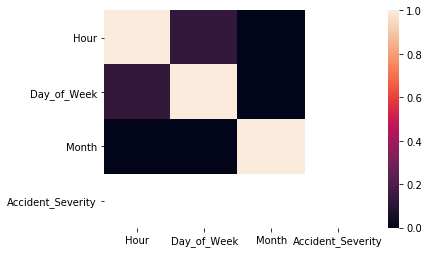

In [24]:
# Relation between hour, day, week, month with number of fatal accident
sns.heatmap(q1_df.corr())

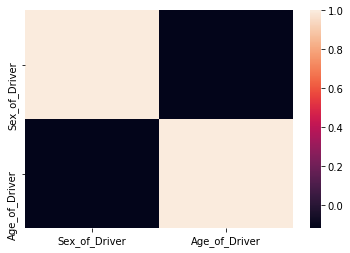

In [29]:
 # Relation between driver age and number of accident
q2_df=  pd.DataFrame(data=df, columns=['Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver','Age_Band_of_Driver','Driver_Home_Area_Type'])
q2_df=q2_df[q2_df.Sex_of_Driver !=-1]
map_df={1:'Journey as part of work',2:'Commuting to/from work',3:'Taking pupil to/from school',4:'Pupil riding to/from school',5:'Other',6:'Not known',15:'Not known/Other'}
map_df_age={1:'0 - 5',2:'6 - 10',3:'11 - 15',4:'16 - 20',5:'21 - 25',6:'26 - 35',7:'36 - 45',8:'46 - 55',9:'56 - 65',10:'66 - 75',11:'Over 75'}
map_df_area={1:'Urban Area',2:'Small Town',3:'Rural'}
q2_df.Age_Band_of_Driver=q2_df.Age_Band_of_Driver.map(map_df_age)
q2_df.Journey_Purpose_of_Driver=q2_df.Journey_Purpose_of_Driver.map(map_df)
q2_df.Driver_Home_Area_Type=q2_df.Driver_Home_Area_Type.map(map_df_area)
q2_df.head()
sns.heatmap(q2_df.corr())

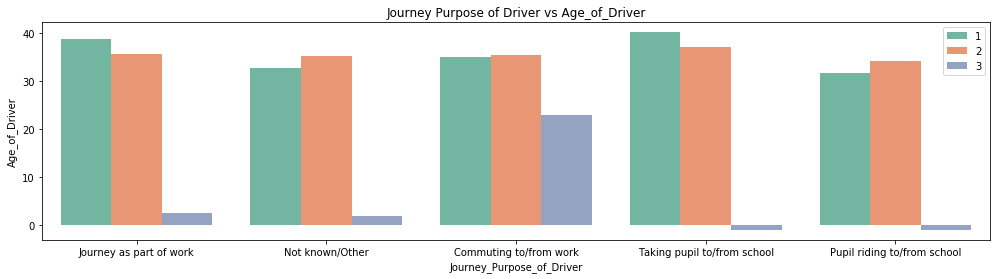

In [31]:
# Journey Purpose of Driver vs Age_of_Driver
plt.figure(figsize=(17,4))
sns.barplot('Journey_Purpose_of_Driver','Age_of_Driver',hue='Sex_of_Driver',data=q2_df,ci=None, palette='Set2')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Journey Purpose of Driver vs Age_of_Driver')
plt.show()

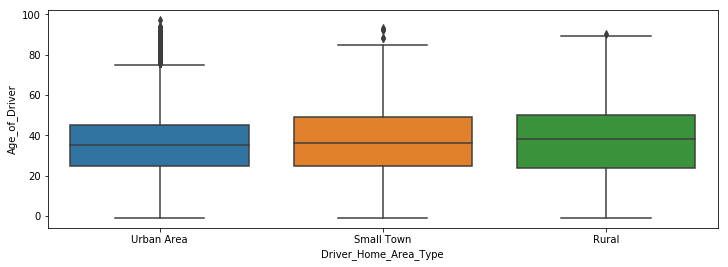

In [32]:
#It is seen that the Drivers who met with an accident were in the age range of 30-40 years.
#Usually, drivers who meet with an accident are males.
plt.figure(figsize=(12,4))
sns.boxplot('Driver_Home_Area_Type','Age_of_Driver',data=q2_df)


In [35]:
# weather impact the number or severity of an accident
q3_df=pd.DataFrame(data=df,columns=['Accident_Severity','Light_Conditions','Weather_Conditions','Hour'])

#creating function to identify time of day: morning, afternoon, evening, night, etc.
def time_of_day(n):
    if n in range(4,8):
        return 'Early Morning'
    elif n in range(8,12):
        return 'Morning'
    elif n in range(12,17):
        return 'Afternoon'
    elif n in range(17,20):
        return 'Evening'
    elif n in range(20,25) or n==0:
        return 'Night'
    elif n in range(1,4):
        return 'Late Night'

q3_df['Time_of_Day']=q3_df['Hour'].apply(lambda x: time_of_day(x))
q3_df.head()

,Accident_Severity,Light_Conditions,Weather_Conditions,Hour,Time_of_Day
0,3,1,1,50,None
1,3,4,1,5,Early Morning
2,3,1,1,41,None
3,3,4,1,35,None
4,3,1,1,30,None


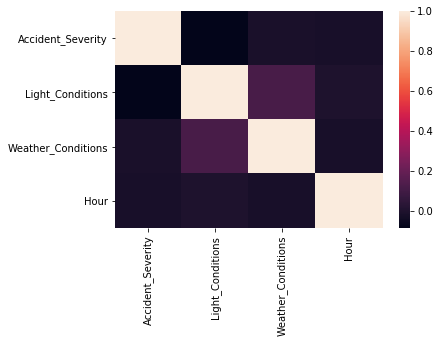

In [37]:
q3_df=q3_df[q3_df.Weather_Conditions!=-1]
sns.heatmap(q3_df.corr())

'\n1: Fatal\n2: Serious\n3: Slight\nWeather Conditions\n\n1: Fine no high winds\n2: Raining no high winds\n3: Snowing no high winds\n4: Fine + high winds\n5: Raining + high winds\n6: Snowing + high winds\n7: Fog or mist\n8: Other\n9: Unknown '

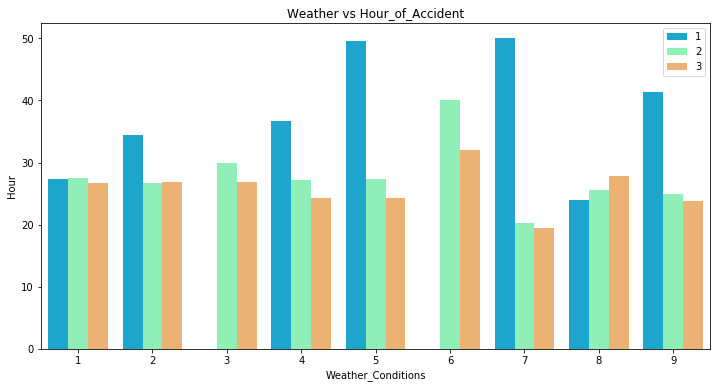

In [41]:
#Weather vs Hour_of_Accident
plt.figure(figsize=(12,6))
sns.barplot('Weather_Conditions','Hour',data=q3_df, hue='Accident_Severity',ci=None, palette='rainbow')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Weather vs Hour_of_Accident')

'''
1: Fatal
2: Serious
3: Slight
Weather Conditions

1: Fine no high winds
2: Raining no high winds
3: Snowing no high winds
4: Fine + high winds
5: Raining + high winds
6: Snowing + high winds
7: Fog or mist
8: Other
9: Unknown '''

In [43]:
#Accident Severity
df.Accident_Severity.value_counts()

3    61433
2     8058
1      771
Name: Accident_Severity, dtype: int64

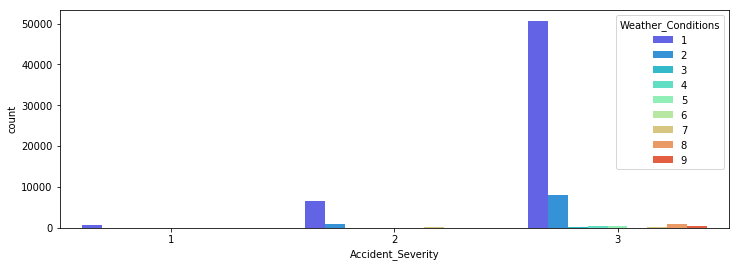

In [44]:
plt.figure(figsize=(12,4))
sns.countplot(x='Accident_Severity',data=q3_df,hue='Weather_Conditions',palette='rainbow')

In [46]:
'''Accidents usually take place in the afternoon: refer fig: Weather vs Hour_of_Accident
Accidents with Slight severity occured the most
Accidents ususally took place when the Weather conditions were fine and also there were not any high winds : 
meaning which the weather conditions didn not effectively contribute to occurences of accidents'''

'Accidents usually take place in the afternoon: refer fig: Weather vs Hour_of_Accident\nAccidents with Slight severity occured the most\nAccidents ususally took place when the Weather conditions were fine and also there were not any high winds : \nmeaning which the weather conditions didn not effectively contribute to occurences of accidents'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

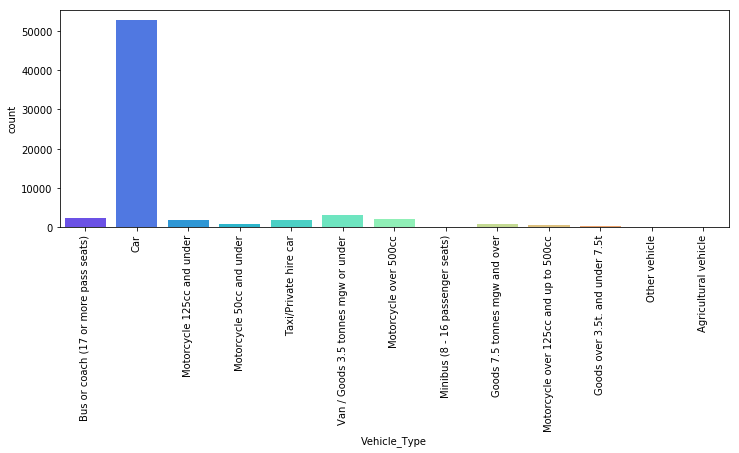

In [62]:
#Are certain car models safer than others?

q4_df=pd.DataFrame(data=df,columns=['Vehicle_Type','Age_of_Vehicle','Was_Vehicle_Left_Hand_Drive?','Propulsion_Code','Engine_Capacity_(CC)'])
q4_df=q4_df[q4_df.Vehicle_Type!=-1]
q4_df=q4_df[q4_df.Age_of_Vehicle!=-1]
q4_df=q4_df[q4_df.Propulsion_Code!=-1]
q4_df=q4_df[q4_df['Engine_Capacity_(CC)']!=-1]

map_vehicle_type={1:'Pedal cycle',
2:'Motorcycle 50cc and under',
3:'Motorcycle 125cc and under',
4:'Motorcycle over 125cc and up to 500cc',
5:'Motorcycle over 500cc',
8:'Taxi/Private hire car',
9:'Car',
10:'Minibus (8 - 16 passenger seats)',
11:'Bus or coach (17 or more pass seats)',
16:'Ridden horse',
17:'Agricultural vehicle',
18:'Tram',
19:'Van / Goods 3.5 tonnes mgw or under',
20:'Goods over 3.5t. and under 7.5t',
21:'Goods 7.5 tonnes mgw and over',
22:'Mobility scooter',
23:'Electric motorcycle',
90:'Other vehicle',
97:'Motorcycle - unknown cc',
98:'Goods vehicle - unknown weight'
}
q4_df['Vehicle_Type']=q4_df.Vehicle_Type.map(map_vehicle_type)

map_prop={1:'Petrol',
2:'Heavy oil',
3:'Electric',
4:'Steam',
5:'Gas',
6:'Petrol/Gas (LPG)',
7:'Gas/Bi-fuel',
8:'Hybrid electric',
9:'Gas Diesel',
10:'New fuel technology',
11:'Fuel cells',
12:'Electric diesel'
}
q4_df['Propulsion_Code']=q4_df.Propulsion_Code.map(map_prop)

q4_df=q4_df[q4_df['Was_Vehicle_Left_Hand_Drive?']!=-1]
q4_df.head()

plt.figure(figsize=(12,4))
sns.countplot('Vehicle_Type',data=q4_df, palette='rainbow')
plt.xticks(rotation=90)



In [64]:
#let's begin with prediction of fatal accidents
fatal_df=pd.DataFrame(data=df,columns=['Sex_of_Driver','Age_of_Driver','Vehicle_Type','Month','Accident_Severity'])
fatal_df=fatal_df[(fatal_df.Sex_of_Driver!=-1) & (fatal_df.Vehicle_Type!=-1) & (fatal_df.Sex_of_Driver!=-1) & (fatal_df.Sex_of_Driver!=3)]
fatal_df.head()

,Sex_of_Driver,Age_of_Driver,Vehicle_Type,Month,Accident_Severity
0,1,57,11,1,3
1,2,37,9,1,3
2,1,28,3,2,3
3,1,38,9,2,3
4,2,-1,9,3,3


In [66]:
acc=pd.get_dummies(data=fatal_df,columns=['Accident_Severity'])
sex=pd.get_dummies(data=fatal_df,columns=['Sex_of_Driver'])
sex.head()

,Age_of_Driver,Vehicle_Type,Month,Accident_Severity,Sex_of_Driver_1,Sex_of_Driver_2
0,57,11,1,3,1,0
1,37,9,1,3,0,1
2,28,3,2,3,1,0
3,38,9,2,3,1,0
4,-1,9,3,3,0,1


In [67]:
fatal_df=pd.concat([fatal_df,acc['Accident_Severity_1'],sex['Sex_of_Driver_1']],axis=1)
fatal_df.head()

,Sex_of_Driver,Age_of_Driver,Vehicle_Type,Month,Accident_Severity,Accident_Severity_1,Sex_of_Driver_1
0,1,57,11,1,3,0,1
1,2,37,9,1,3,0,0
2,1,28,3,2,3,0,1
3,1,38,9,2,3,0,1
4,2,-1,9,3,3,0,0


In [68]:
fatal_df.drop(['Accident_Severity','Sex_of_Driver'],axis=1,inplace=True)
fatal_df.head()

,Age_of_Driver,Vehicle_Type,Month,Accident_Severity_1,Sex_of_Driver_1
0,57,11,1,0,1
1,37,9,1,0,0
2,28,3,2,0,1
3,38,9,2,0,1
4,-1,9,3,0,0


In [70]:
#Note: Accident_Severity_1 corresponds to fatal accident and Sex_of_Driver_1 corresponds to male driver
X=fatal_df.drop('Accident_Severity_1',axis=1)
y=fatal_df['Accident_Severity_1']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y)

In [72]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
predictions= dtree.predict(X_test)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     16939
           1       0.29      0.04      0.08       180

   micro avg       0.99      0.99      0.99     17119
   macro avg       0.64      0.52      0.54     17119
weighted avg       0.98      0.99      0.98     17119



In [76]:
print(confusion_matrix(y_test,predictions))

[[16919    20]
 [  172     8]]
